# Session 3 - Data Plotting

## Warm up Bitcoin 2014-2023 數據 Data

a) 找出單日最大波幅發生的日子 (比較單日High/Low)  
Find the date with the highest differece within the day (Compare High and Low).  


提交格式 (print):  
Submission Format (print):   

最大波幅發生的日子: 2000-01-01

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf

btc_usd = yf.Ticker("BTC-USD")
btc_data = btc_usd.history(period='max')
btc_data = btc_data.reset_index()

btc_data
# Your code here

b)找出收市價(Close)發生的最大差別(正或負)的連續兩個交易日  
提示: pandas 的 shift function  
Find out the two consecutive transaction period that have the biggest absolute difference (Compare the Closing Price).  

提交格式 (print):  
Submission Format (print):  

收市價(Close)發生的最大差別的連續兩個交易在 2020-01-01 和 2020-01-02, 差別為 100000

In [ ]:
# Your code here

## Exercise: 2023 對比 2019 的平均賭收回復率

找出並計算 2023 的<b>總博彩毛收入</b>, 除以 2019 的<b>總博彩毛收入</b>  
Find out the 2019 GGR divided by 2023 GGR.  


資料來源:  
Datasource:  
https://www.dicj.gov.mo/web/cn/information/DadosEstat_mensal/index.html    
或  
https://www.dicj.gov.mo/web/cn/information/DadosEstat_mensal/2023/report_cn.xml  
https://www.dicj.gov.mo/web/cn/information/DadosEstat_mensal/2019/report_cn.xml  
  
提交格式 (print):   
Submission Format (print):  
2023 對比 2019 的平均賭收回復率為 XX %
  
  
註: 數據不能hard code在代碼中

# Plotting

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn-v0_8')

## Countries and Population dataset

In [ ]:
dataset = pd.read_csv('countries.csv')
dataset

We need to register the following converter explicitly, otherwise, we will get a warning.

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Plotting counties comparation

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

Text(0, 0.5, 'Population (Million)')

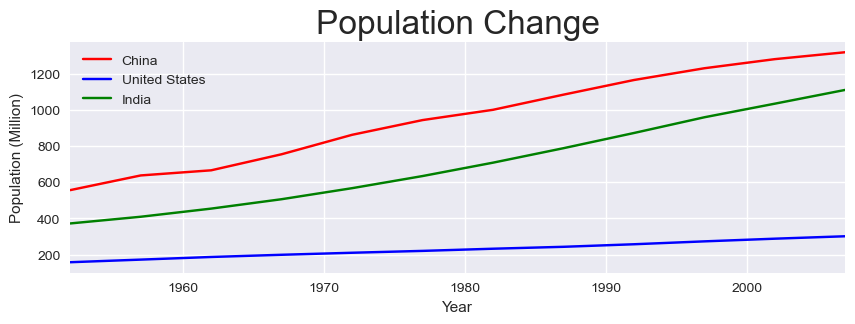

In [ ]:
data = pd.read_csv('countries.csv', delimiter=',')

data['population'] = data['population'] / 100_0000
data['year'] = pd.to_datetime(data['year'], format='%Y')

china_data = data[data['country']=='China']
us_data = data[data['country']=='United States']
india_data = data[data['country']=='India']

fig, ax = plt.subplots(figsize=(10,3))
china_data.plot(x='year',y='population', ax=ax, color='red')
us_data.plot(x='year',y='population', ax=ax, color='blue')
india_data.plot(x='year',y='population', ax=ax, color='green')
ax.legend(['China','United States','India'])
ax.set_title('Population Change', size=24)
ax.set_xlabel('Year')
ax.set_ylabel('Population (Million)')

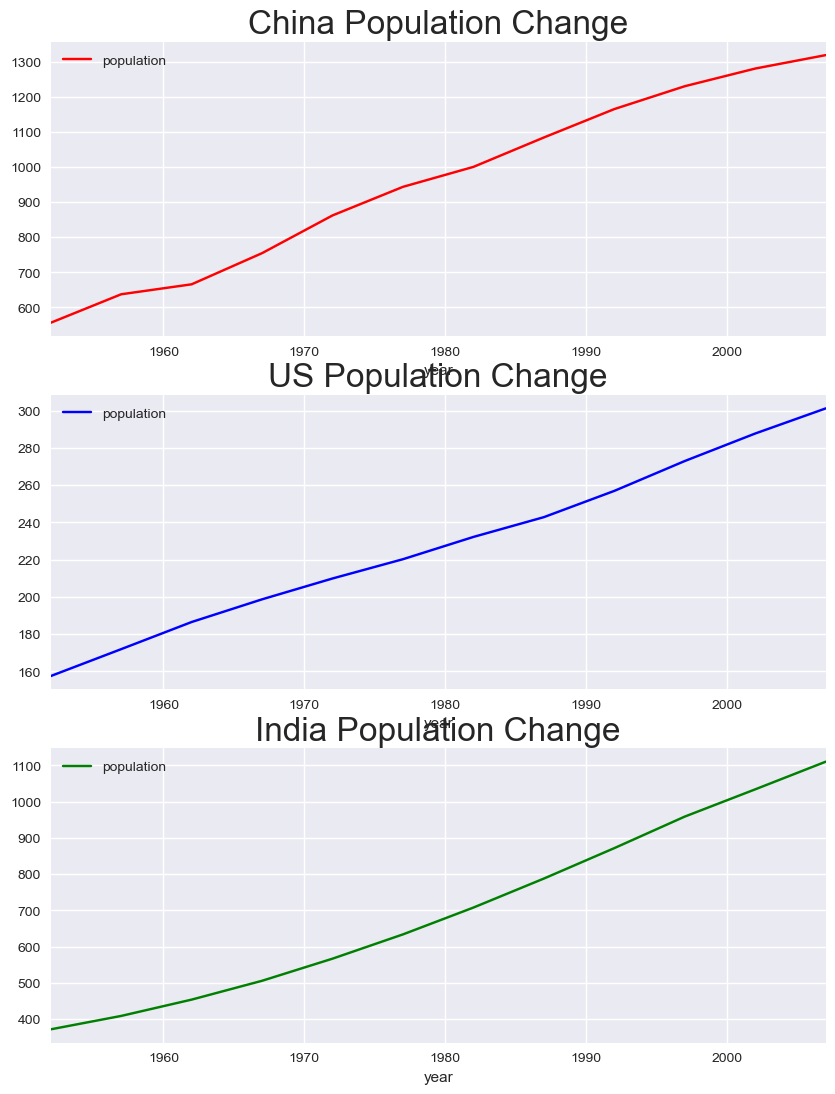

In [ ]:
data = pd.read_csv('countries.csv', delimiter=',')

data['population'] = data['population'] / 1000000
data['year'] = pd.to_datetime(data['year'], format='%Y')

china_data = data[data['country']=='China']
us_data = data[data['country']=='United States']
india_data = data[data['country']=='India']

fig, ax = plt.subplots(3, figsize=(10,13))
china_data.plot(x='year',y='population', ax=ax[0], color='red')
us_data.plot(x='year',y='population', ax=ax[1], color='blue')
india_data.plot(x='year',y='population', ax=ax[2], color='green')
# ax.legend(['China','United States','India'])
ax[0].set_title('China Population Change', size=24)
ax[1].set_title('US Population Change', size=24)
ax[2].set_title('India Population Change', size=24)
# ax.set_xlabel('Year')
# ax.set_ylabel('Population (Million)')
fig.savefig('output3.png',dpi=300)
# extent = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# fig.savefig('ax2_figure.png', bbox_inches=extent)

### Top 10 countries plotting as at 2007 population

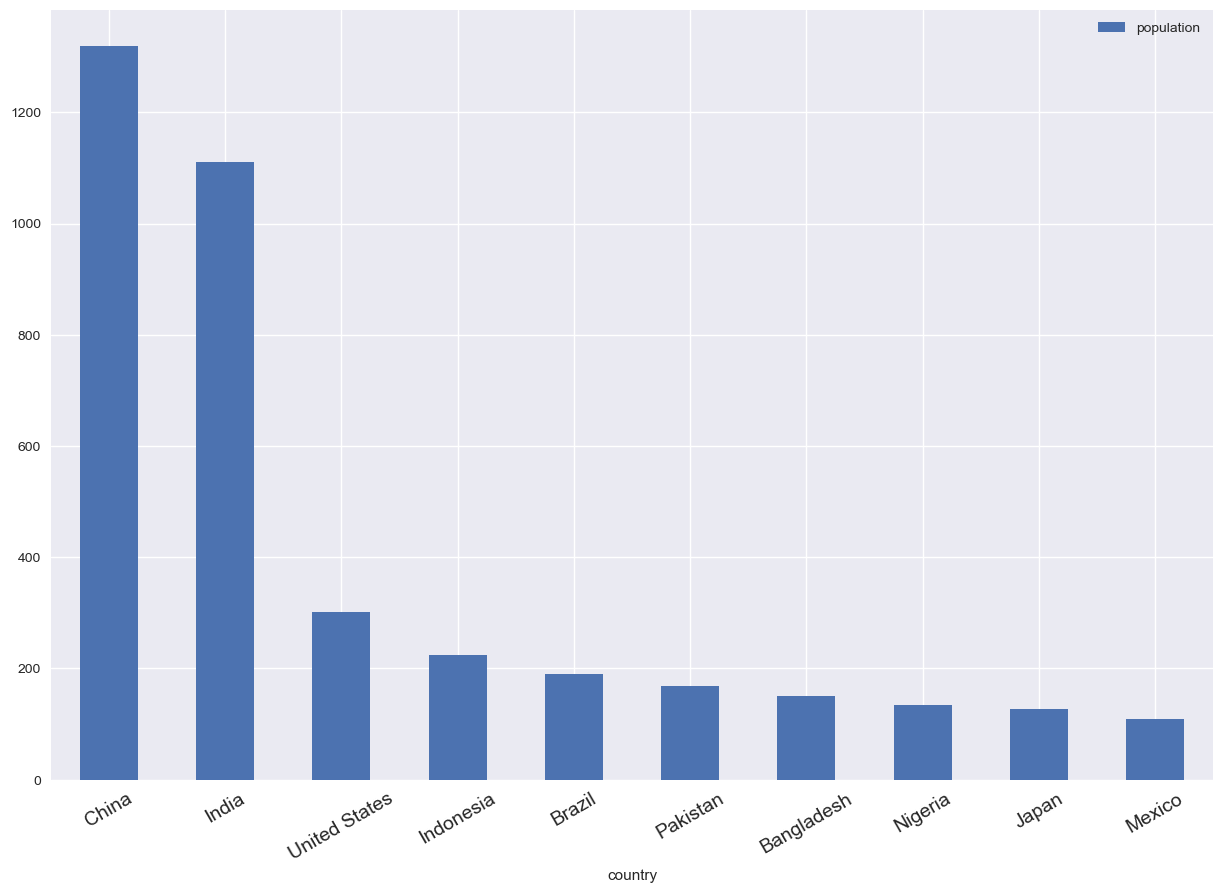

In [ ]:
data = pd.read_csv('countries.csv', delimiter=',')

data['population'] = data['population'] / 1000000

year_2007 = data[data['year']==2007]
year_2007 = year_2007.sort_values(by='population', ascending=False)
year_2007 = year_2007.iloc[:10,:]

fig, ax = plt.subplots(figsize=(15,10))
year_2007.plot(kind='bar', x='country', y='population', ax=ax)
ax.tick_params(axis='x', labelsize=14, labelrotation = 30)

# Macau Visitor Arrial vs Average Spending

In [ ]:
import pandas as pd
from urllib.request import urlretrieve

urlretrieve('https://api.data.gov.mo/datadir/downloadSingleFile?fileId=843&dataDirId=f02b334a-cc44-4433-b942-672de0fdad13&token=ygOOep78DSsIY7VrgQN8D1LOiE7yKQAt', 'average_spending.xlsx')
urlretrieve('https://api.data.gov.mo/datadir/downloadSingleFile?fileId=838&dataDirId=3546225a-2a34-4645-b01e-6752aed03993&token=ygOOep78DSsIY7VrgQN8D1LOiE7yKQAt', 'visitor_arrival.xlsx')

df = pd.read_excel('visitor_arrival.xlsx')
display(df)
spending_df = pd.read_excel('average_spending.xlsx')
display(spending_df)

,period,value
0,2023年,28213003
1,2022年,5700339
2,2021年,7705943
3,2020年,5896848
4,2019年,39406181
...,...,...
205,2008年5月,2000282
206,2008年4月,1934585
207,2008年3月,2135523
208,2008年2月,2000243


,period,value
0,2023年,2525
1,2022年,3187
2,2021年,3173
3,2020年,2025
4,2019年,1626
...,...,...
65,2011年第一季,1516
66,2010年第四季,1682
67,2010年第三季,1529
68,2010年第二季,1436


In [ ]:
df = df[df['period'].str.contains('月')]
df['period'] = pd.to_datetime(df['period'], format='%Y年%m月')
df

In [ ]:
spending_df = spending_df[spending_df['period'].str.contains('季')]

def getMonthFromSeason(x):
    if x == '一':
        return 1
    elif x == '二':
        return 4
    elif x == '三':
        return 7
    elif x == '四':
        return 10
spending_df['month'] = spending_df['period'].str[-2].apply(getMonthFromSeason)
spending_df['period_date'] = spending_df['period'].str[:4] + '-' + spending_df['month'].astype('str')
spending_df


,period,value,month,period_date
13,2023年第三季,2366,7,2023-7
14,2023年第二季,2610,4,2023-4
15,2023年第一季,3027,1,2023-1
16,2022年第四季,3614,10,2022-10
17,2022年第三季,3222,7,2022-7
18,2022年第二季,2421,4,2022-4
19,2022年第一季,3514,1,2022-1
20,2021年第四季,3235,10,2021-10
21,2021年第三季,2626,7,2021-7
22,2021年第二季,3271,4,2021-4


In [ ]:
spending_df['period_date'] = pd.to_datetime(spending_df['period_date'], format='%Y-%m')
spending_df

,period,value,month,period_date
13,2023年第三季,2366,7,2023-07-01
14,2023年第二季,2610,4,2023-04-01
15,2023年第一季,3027,1,2023-01-01
16,2022年第四季,3614,10,2022-10-01
17,2022年第三季,3222,7,2022-07-01
18,2022年第二季,2421,4,2022-04-01
19,2022年第一季,3514,1,2022-01-01
20,2021年第四季,3235,10,2021-10-01
21,2021年第三季,2626,7,2021-07-01
22,2021年第二季,3271,4,2021-04-01


<Axes: xlabel='period_date'>

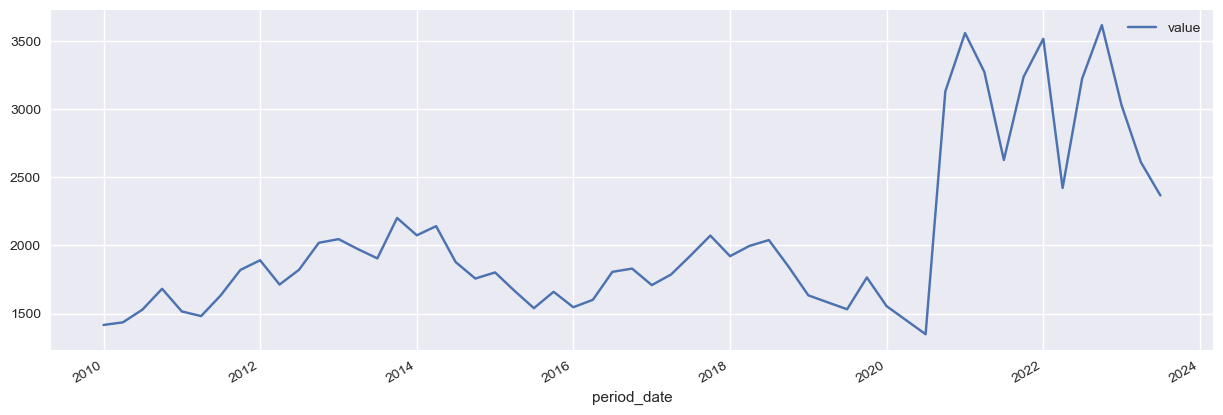

In [ ]:
spending_df = spending_df[spending_df['period']!='2020年第二季']
spending_df['period']
fig, ax = plt.subplots(figsize=(15,5))
spending_df.plot(x='period_date',y='value',ax=ax,kind='line')
# df.plot(x='period', y='value', kind='line', ax=ax)

Text(0.5, 1.0, 'Arrival vs Avg.Spending')

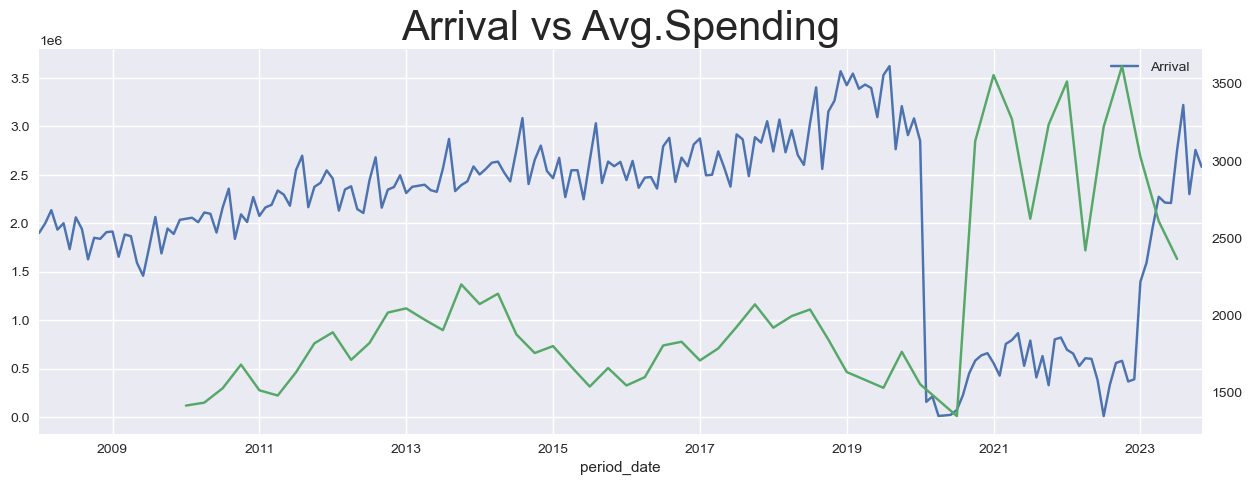

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

df.plot(x='period', y='value', kind='line', ax=ax)
spending_df.plot(x='period_date', y='value', kind='line', ax=ax, secondary_y = True)

ax.legend(['Arrival','Avg. Spending'])
ax.set_title('Arrival vs Avg.Spending', size=30)


## 按行業統計外地僱員人數及企業/實體數目

https://data.gov.mo/Detail?id=a31fbaa6-7b6d-4172-bb5e-96001f39008b

In [ ]:
blue_card = pd.DataFrame()
headers = {
    'Authorization': 'APPCODE 09d43a591fba407fb862412970667de4'
}
for i in range(2012,2024):
    for m in range(1,13):
        print(f"Getting {i}-{m}")
        try:
            params = {
                'year':i,
                'month':m
            }
            res = requests.get('https://dsal.apigateway.data.gov.mo/api/getA2'
                               ,headers=headers
                              ,params=params)
            if res.status_code == 200:
                blue_card=pd.concat(
                    [blue_card,pd.read_json(res.text)]
                )
        except:
            continue


Getting 2012-1
Getting 2012-2
Getting 2012-3
Getting 2012-4
Getting 2012-5
Getting 2012-6
Getting 2012-7
Getting 2012-8
Getting 2012-9
Getting 2012-10
Getting 2012-11
Getting 2012-12
Getting 2013-1
Getting 2013-2
Getting 2013-3
Getting 2013-4
Getting 2013-5
Getting 2013-6
Getting 2013-7
Getting 2013-8
Getting 2013-9
Getting 2013-10
Getting 2013-11
Getting 2013-12
Getting 2014-1
Getting 2014-2
Getting 2014-3
Getting 2014-4
Getting 2014-5
Getting 2014-6
Getting 2014-7
Getting 2014-8
Getting 2014-9
Getting 2014-10
Getting 2014-11
Getting 2014-12
Getting 2015-1
Getting 2015-2
Getting 2015-3
Getting 2015-4
Getting 2015-5
Getting 2015-6
Getting 2015-7
Getting 2015-8
Getting 2015-9
Getting 2015-10
Getting 2015-11
Getting 2015-12
Getting 2016-1
Getting 2016-2
Getting 2016-3
Getting 2016-4
Getting 2016-5
Getting 2016-6
Getting 2016-7
Getting 2016-8
Getting 2016-9
Getting 2016-10
Getting 2016-11
Getting 2016-12
Getting 2017-1
Getting 2017-2
Getting 2017-3
Getting 2017-4
Getting 2017-5
Getting 20

# Exercise  

畫出過去2014年至今的外僱數量走勢 (折線圖)  

blue_card['ne_workers_number'] + blue_card['te_workers_number'] + blue_card['xe_workers_number']